# Table of Contents
### Importing Libaries and Data Sets
### Crosstab
### Task 2 Considering PII, Security Implications
### Task 3 Creating region(s) flag from the state column
### Comparing spending habits normalized in each region
### Chart showing low and high spenders normalized number of customers in each region
### Task 4 Creating an exclusion flag for low-activity customers (customers with less than 5 orders)

## 1. Importing libraries and data sets

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl

In [2]:
#creating pathway for dataframes
path = os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/02 Data')

In [3]:
#import orders_products_customer_updated
ords_prods =pd.read_pickle(os.path.join(path,'Prepared Data', 'orders_products_customers_updated.pkl'))

In [4]:
#loading garbage collector
import gc

In [5]:
ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 29 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                object        
 1   user_id                 object        
 2   clients_order_number    int8          
 3   orders_day_of_week      int8          
 4   order_hour_of_day       int8          
 5   days_since_prior_order  float16       
 6   product_id              int32         
 7   add_to_cart_order       int32         
 8   reordered               int8          
 9   product_name            object        
 10  aisle_id                int8          
 11  department_id           int8          
 12  prices                  float32       
 13  price_range_loc         object        
 14  busiest_days            object        
 15  busiest_period_of_day   object        
 16  max_order               int8          
 17  loyalty_flag            object        
 18  

In [6]:
# Checking df

ords_prods.head()

,order_id,user_id,clients_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_order_frequency,order_frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423


## Crosstab

In [8]:
#Change type for clients_order_number for ords_prods from float16 to float 32 cos of Error Message for Crosstab

ords_prods['days_since_prior_order']=ords_prods['days_since_prior_order'].astype('float32')

In [9]:
# Create Crosstab for 'days_since_prior_order'
crosstab = pd.crosstab(ords_prods['days_since_prior_order'], ords_prods['clients_order_number'], dropna = False)

In [10]:
crosstab.to_clipboard()

In [11]:
#delete crosstab to save space 

del crosstab

gc.collect()

1394

## Task 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

### reviewing column headers above  for PHI implications. PII data column 'first_name' and 'last_name' were previously removed, no changes made this time.

## Task 3. Analysis of Regional Sales

### Creating a 'Region' Column

In [13]:
# Creating a for-loop for 'region'

result = []

for value in ords_prods['state']:
    if value in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
                 'Pennsylvania', 'New Jersey'):
        result.append('Northeast')
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota' , 'South Dakota', 'Nebraska', 
                   'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
                   'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
                   'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append('West')
    else:
        result.append('Unknown')  

In [15]:
# Creating a new "Region" column with the result list

ords_prods['region'] = result

In [16]:
# value counts for the new column

ords_prods['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [17]:
# Checking if the numbers adds up to the total number of records in the data frame

10791885 + 8292913 + 7597325 + 5722736

32404859

### Comparing spending habits in each region

In [18]:
#Creating new pivot table for 'region' and 'spending_flag'

df_region_spending = ords_prods.pivot_table(index='region', columns='spending_flag', values='order_id', aggfunc='count', fill_value=0)

In [19]:
df_region_spending.head()

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [21]:
# To normalize the spending_flag column based on the number of customers in each region:
# First, calculate the total number of customers in each region

total_customers = ords_prods.groupby('region')['user_id'].count()

In [22]:
total_customers

region
Midwest       7597325
Northeast     5722736
South        10791885
West          8292913
Name: user_id, dtype: int64

In [23]:
# Normalize the counts by dividing by the total customers in each region

result_normalized = df_region_spending.div(total_customers, axis=0)

In [24]:
result_normalized

spending_flag,High spender,Low spender
region,,
Midwest,0.020530,0.979470
Northeast,0.018911,0.981089
South,0.019430,0.980570
West,0.019336,0.980664


In [25]:
# Multiply by 100 to gain result as a percentage
result_normalized_percent = result_normalized * 100

In [26]:
result_normalized_percent

spending_flag,High spender,Low spender
region,,
Midwest,2.053025,97.946975
Northeast,1.891141,98.108859
South,1.943043,98.056957
West,1.933627,98.066373


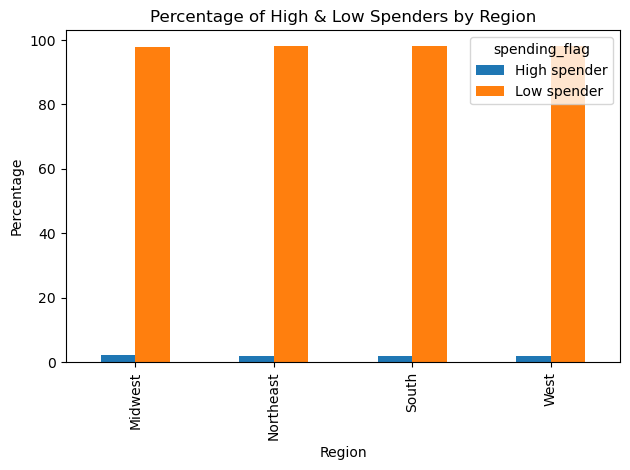

In [31]:
# Create a grouped bar chart from the result_normalized_percent results

spending_region_bar = result_normalized_percent.plot.bar()

# Add labels
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Percentage of High & Low Spenders by Region')

# Adjust the layout to ensure everything fits
plt.tight_layout()

### Export Barchart Percentage of High & Low Spenders by Region

In [32]:
spending_region_bar.figure.savefig(os.path.join(r'/Users/katja/Documents/Instacart Basket Analysis/04 Analysis/Visualizations/spending_region_bar.png'))

In [33]:
#delete df to save space 

del spending_region_bar
del df_region_spending
del total_customers
del result_normalized
del result_normalized_percent

gc.collect()

7240

## Task 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Export this sample.

In [36]:
# Creating exclusion flag

ords_prods['exclusion_flag'] = np.where(ords_prods['max_order'] < 5, 'Yes', 'No')

In [39]:
# Checking new column

ords_prods.head()

,order_id,user_id,clients_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,No


In [40]:
# Creating a new data frame for all the customers who have ordered fewer than 5 times.

df_cust_below_five_ord = ords_prods[ords_prods['exclusion_flag'] == 'Yes']

In [41]:
df_cust_below_five_ord.shape

(1440295, 31)

In [42]:
# Exporting df_cust_below_five_ord with the "under 5 orders" records

df_cust_below_five_ord.to_pickle(os.path.join(path,'Prepared Data', 'df_below_five_order.pkl'))

In [43]:
# Removing the "under 5 orders" records from the main data

ords_prods = ords_prods[ords_prods['exclusion_flag'] != 'Yes']

In [44]:
ords_prods.shape

(30964564, 31)

In [45]:
# Checking that the new amount of records in the main data, plus the number of records in the excluded records
# data frame, matches the original data frame record number.

1440295 + 30964564

32404859

### Export Dataset (to include changes of exclusion of low activity users)

In [46]:
#Export ords_prods to PKL
ords_prods.to_pickle(os.path.join(path,'Prepared Data', 'orders_products_customers_updated.pkl'))

In [48]:
#delete df to save space 

del ords_prods
del df_cust_below_five_ord


gc.collect()

2391